In [6]:
import torch
import requests
import zipfile
import matplotlib.pyplot as plt
import glob as glob
import os
import ast
import numpy as np
from PIL import Image

In [7]:
def download_file(url, save_name):

    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [8]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [9]:
download_file(
    "https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt",
    "imagenet_classes.txt")

download_file(
    'https://www.dropbox.com/s/cprmbjb8l3olyiv/dataset_image_classification_cnn.zip?dl=1',
    'dataset_image_classification_cnn.zip'
)

unzip(zip_file='dataset_image_classification_cnn.zip')

Extracted all


In [10]:
# Store all the image paths in a list.
image_paths = glob.glob('dataset_image_classification_cnn/*.jpg')
print(image_paths)

['dataset_image_classification_cnn\\car.jpg', 'dataset_image_classification_cnn\\dog.jpg', 'dataset_image_classification_cnn\\tiger.jpg']


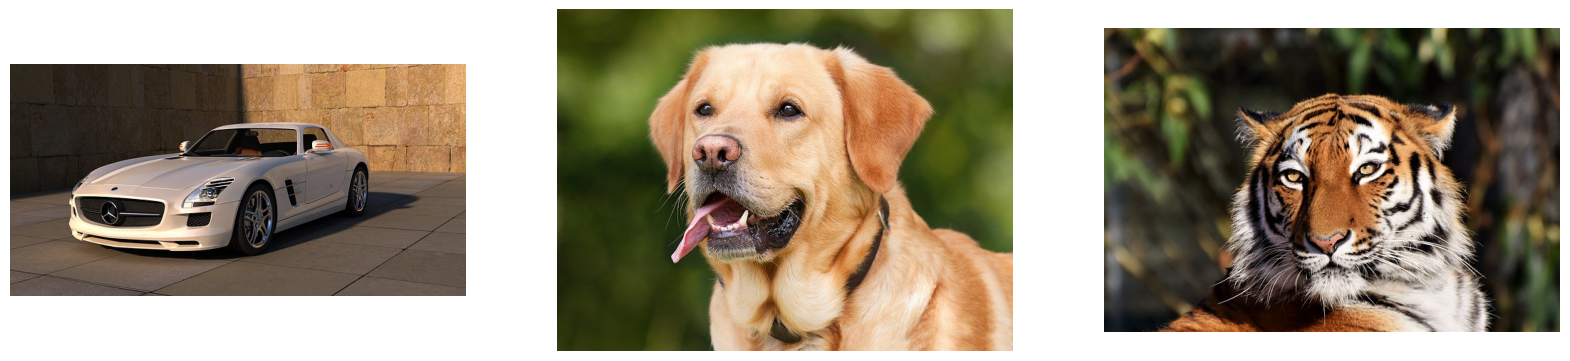

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(1, 3, idx+1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [18]:
# Load the pre-trained ResNet50 model.
from torchvision.models import resnet50, ResNet50_Weights
model = resnet50(weights='IMAGENET1K_V1')
# Set model to eval mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

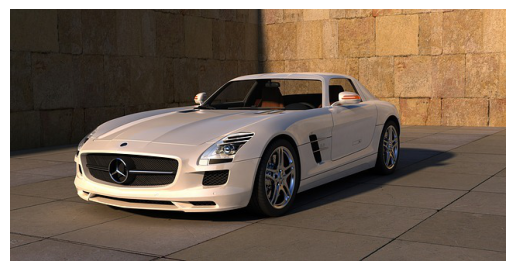

Prediction 0: sports car, 60.14%
Prediction 1: convertible, 33.91%
Prediction 2: car wheel, 3.14%
Prediction 3: grille, 1.34%
Prediction 4: racer, 1.05%


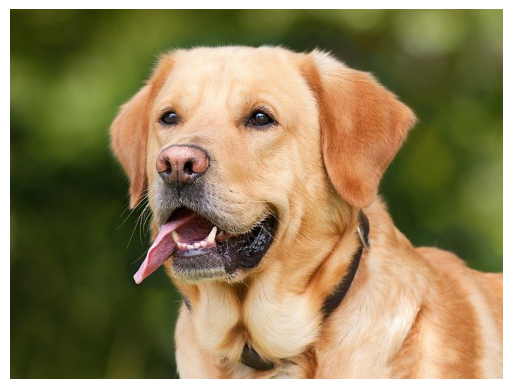

Prediction 0: Labrador retriever, 61.20%
Prediction 1: golden retriever, 31.79%
Prediction 2: tennis ball, 0.94%
Prediction 3: Rhodesian ridgeback, 0.86%
Prediction 4: soccer ball, 0.51%


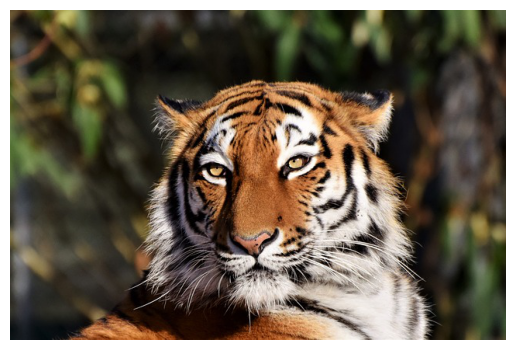

Prediction 0: tiger, 80.59%
Prediction 1: tiger cat, 19.25%
Prediction 2: jaguar, 0.07%
Prediction 3: leopard, 0.03%
Prediction 4: lynx, 0.01%


In [20]:
# load the class labels
with open('imagenet_classes.txt') as f:
    whip = {en:line.strip() for en,line in enumerate(f.readlines())}

for _, image_path in enumerate(image_paths):

    # Read image using opencv.
    img = Image.open(image_path)

    # get evaluation transformations
    weights = ResNet50_Weights.IMAGENET1K_V1
    preprocess = weights.transforms()

    # Preprocess the batched image
    img_transformed = preprocess(img)

    # Add batch dimension at the beginning.
    image_batch = torch.unsqueeze(img_transformed, axis=0)

    # Forward pass through the model.
    predictions = model(image_batch)

    #apply softmax layer
    predictions=torch.softmax(predictions,-1)

    # Get top 5 predictions
    sorted_predictions = np.argsort(predictions.detach().numpy())[0,-5:][::-1]

    # Display the image and print the top 5 predictions for each.
    plt_image = plt.imread(image_path)
    plt.imshow(plt_image)
    plt.axis('off')
    plt.show()
    for num, pred in enumerate(sorted_predictions):
        print(f"Prediction {num}: {whip[pred].split(',')[0]}, {predictions[0][pred]*100:.2f}%")

In [ ]:
#In this notebook, we learned how to perform image classification using a pre-trained ResNet50 model.